<a href="https://colab.research.google.com/github/imkunals726/ML/blob/master/Flowers_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install kaggle

In [0]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kunals726","key":"c737d0cfb03c893fdf61ff0b70b5b0a1"}'}



```
Please upload kaggle.json obtained from kaggle (Api Key)
```



In [4]:
!ls | grep kaggle

kaggle.json


In [0]:
!mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets list -s flowers

ref                                             title                                        size  lastUpdated          downloadCount  
----------------------------------------------  -----------------------------------------  ------  -------------------  -------------  
alxmamaev/flowers-recognition                   Flowers Recognition                         450MB  2018-06-28 01:34:18          27374  
mgornergoogle/five-flowers                      Five Flowers                               1013MB  2020-01-28 00:11:21             94  
saidakbarp/17-category-flowers                  17 category flowers                          58MB  2018-10-15 22:01:34            681  
cdeotte/oxford-flowers-tfrecords                Oxford Flowers TFRecords                      6GB  2020-03-12 16:20:14             52  
msheriey/104-flowers-garden-of-eden             104 Flowers: Garden of Eden                   2GB  2020-02-15 18:30:09            214  
arshid/iris-flower-dataset                      

In [9]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 441M/450M [00:09<00:00, 40.1MB/s]
100% 450M/450M [00:09<00:00, 48.0MB/s]


In [10]:
!ls

flowers-recognition.zip  kaggle.json  sample_data


In [11]:
!unzip flowers-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b7355_n.jpg  
  inflating: flowers/flowers/rose/12323085443_8ac0

In [12]:
!pip3 install tf-nightly

     |████████████████████████████████| 525.1MB 33kB/s 
     |████████████████████████████████| 2.9MB 33.7MB/s 
     |████████████████████████████████| 460kB 39.9MB/s 


In [0]:
import tensorflow as tf

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1/255.,
                             shear_range = 0.2,
                             zoom_range =0.2,
                             rotation_range = 40,
                             horizontal_flip = True,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             validation_split = 0.2,
                             fill_mode= 'nearest'
                             )


Using TensorFlow backend.


In [0]:
!mv flowers/flowers validation_images

In [0]:
train_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'training',
                                    shuffle=True)

Found 3462 images belonging to 5 classes.


In [0]:
val_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'validation',
                                    shuffle=True)

Found 861 images belonging to 5 classes.


In [0]:
pretrained_model = tf.keras.applications.Xception( include_top=False, input_shape=(256,256,3))

83689472/83683744 [==============================] - 1s 0us/step


In [0]:
pretrained_model.trainable = True

<function tensorflow.python.keras.engine.input_layer.Input>

In [0]:


model = tf.keras.Sequential([pretrained_model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dense(5,activation='softmax')
                             ])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])



In [0]:
model.fit(train_data, epochs = 12 , validation_data=val_data )

Epoch 1/12
217/217 [==============================] - 88s 406ms/step - loss: 0.7005 - accuracy: 0.7672 - val_loss: 2.6921 - val_accuracy: 0.6376
Epoch 2/12
217/217 [==============================] - 87s 401ms/step - loss: 0.5005 - accuracy: 0.8293 - val_loss: 2.2743 - val_accuracy: 0.6388
Epoch 3/12
217/217 [==============================] - 89s 412ms/step - loss: 0.4120 - accuracy: 0.8596 - val_loss: 0.4693 - val_accuracy: 0.8502
Epoch 4/12
217/217 [==============================] - 88s 404ms/step - loss: 0.4109 - accuracy: 0.8527 - val_loss: 0.4984 - val_accuracy: 0.8316
Epoch 5/12
217/217 [==============================] - 87s 403ms/step - loss: 0.3324 - accuracy: 0.8873 - val_loss: 0.5890 - val_accuracy: 0.8269
Epoch 6/12
217/217 [==============================] - 86s 398ms/step - loss: 0.3224 - accuracy: 0.8873 - val_loss: 0.5534 - val_accuracy: 0.8304
Epoch 7/12
217/217 [==============================] - 86s 399ms/step - loss: 0.2840 - accuracy: 0.9067 - val_loss: 0.4014 - val_ac

In [0]:
  history = _

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:

stat_info = history.history

In [0]:
stat_info.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
normal_loss = list(enumerate(stat_info['loss']))
val_loss = list(enumerate(stat_info['val_loss']))

In [0]:
normal_loss

[(0, 0.7005015015602112),
 (1, 0.5004741549491882),
 (2, 0.4119555950164795),
 (3, 0.41085848212242126),
 (4, 0.3323616087436676),
 (5, 0.3223959505558014),
 (6, 0.2839970886707306),
 (7, 0.26062101125717163),
 (8, 0.24714764952659607),
 (9, 0.24079826474189758),
 (10, 0.2354264259338379),
 (11, 0.21314871311187744)]

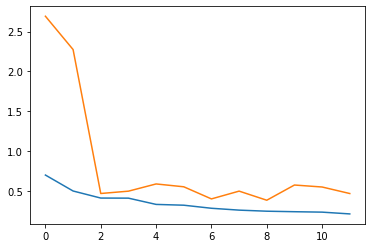

In [0]:
plt.plot([ i[0] for i in normal_loss],[i[1] for i in normal_loss])
plt.plot([ i[0] for i in val_loss],[i[1] for i in val_loss])

In [0]:
model.evaluate(val_data)

54/54 [==============================] - 14s 259ms/step - loss: 0.4862 - accuracy: 0.8780


[0.4862017035484314, 0.8780487775802612]

In [0]:
loss, accuracy = _

In [0]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'validation_images', labels='inferred', label_mode='categorical', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None,
    validation_split=None, subset=None, interpolation='bilinear', follow_links=False
)

Found 4323 files belonging to 5 classes.


In [0]:
model.evaluate(dataset)

136/136 [==============================] - 23s 166ms/step - loss: 160.2584 - accuracy: 0.3079


[160.2583770751953, 0.3078880310058594]

***`This happened because the Image was not rescaled we will rescale the Image and see`***

In [0]:
def rescale(x,y):
  x /= 255.
  return x , y

In [0]:
dataset = dataset.map(rescale)

In [0]:
loss, accuracy = model.evaluate(dataset)

136/136 [==============================] - 23s 166ms/step - loss: 0.2123 - accuracy: 0.9371


In [0]:
accuracy

0.9370807409286499



```
Let's Just try a model which is not using previous models
```



In [0]:
import tensorflow as tf


In [0]:
def resnet_layer(X, filters, kernel_shapes, stage ):

  X_shortcut = X
  last_level = len(filters) - 1

  for idx,(filter_size,kernel_shape) in enumerate(zip(filters,kernel_shapes)):

    X = tf.keras.layers.Conv2D(filter_size,kernel_shape,padding='SAME',activation='relu')(X)
    X = tf.keras.layers.BatchNormalization()(X)

    if idx != last_level:
      X = tf.keras.layers.MaxPool2D((2,2), name = f'max_pool{idx}_stage{stage}')(X)

  X_shortcut = tf.keras.layers.Conv2D(filters[-1],(1,1))(X_shortcut)
  X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)
  X_shortcut = tf.keras.layers.MaxPool2D((2*last_level, 2*last_level), name = f'resnet_pool_stage_{stage}')(X_shortcut)

  X = tf.keras.layers.Add()([X,X_shortcut])

  X = tf.keras.layers.ReLU()(X)

  return X

In [0]:
X_input = tf.keras.layers.Input((256,256,3))

X = tf.keras.layers.Conv2D(32, (3,3) , padding = 'SAME' , activation = 'relu' )(X_input)
X = resnet_layer(X , filters = [32 , 64 ,64] , kernel_shapes = [(3,3), (3,3), (3,3)] , stage = 1  )
X = tf.keras.layers.MaxPool2D((2,2), name = 'afterfisresnetlayer' )(X)


X = tf.keras.layers.Conv2D(128, (3,3) , padding = 'SAME' , activation = 'relu' )(X_input)
X = resnet_layer(X , filters = [128 , 128 , 128] , kernel_shapes = [(3,3), (3,3), (3,3)] , stage = 2  )
X = tf.keras.layers.MaxPool2D((2,2), name = 'aftersecondresnetlayer' )(X)

X = tf.keras.layers.Flatten()(X)

X = tf.keras.layers.Dense(256, activation = 'relu')(X)
# X = tf.keras.layers.Dense(512, activation = 'relu')(X)
preds = tf.keras.layers.Dense(5 , activation = 'softmax')(X)


In [0]:
# X_input = tf.keras.layers.Input((256,256,3))

# X_shortcut = X_input

# X = tf.keras.layers.Conv2D(32,(3,3),padding='SAME',activation='relu')(X_input)
# X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.MaxPool2D((2,2), name = 'max_pool1')(X)

# X = tf.keras.layers.Conv2D(64,(3,3),padding='SAME',activation='relu')(X)
# X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.MaxPool2D((2,2), name = 'max_pool2')(X)

# X = tf.keras.layers.Conv2D(128,(3,3), padding = 'SAME')(X)
# X = tf.keras.layers.BatchNormalization()(X)

# X_shortcut = tf.keras.layers.Conv2D(128,(1,1))(X_shortcut)
# X_shortcut = tf.keras.layers.BatchNormalization()(X_shortcut)
# X_shortcut = tf.keras.layers.MaxPool2D((4,4), name = 'resnet_pool')(X_shortcut)

# X = tf.keras.layers.Add()([X,X_shortcut])

# X = tf.keras.layers.ReLU()(X)


# X = tf.keras.layers.MaxPool2D((2,2),name ='last_pool')(X)

# X = tf.keras.layers.Flatten()(X)

# X = tf.keras.layers.Dense(512,activation='relu')(X)

# preds = tf.keras.layers.Dense(5, activation='softmax')(X)

# # X = tf.keras.layers.Conv2D(128,(3,3),padding='SAME',activation='relu')(X_input)
# # X = tf.keras.layers.MaxPool2D((2,2), name = 'max_pool2')(X)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1/255.,
                             shear_range = 0.2,
                             zoom_range =0.2,
                             rotation_range = 40,
                             horizontal_flip = True,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             validation_split = 0.2,
                             fill_mode= 'nearest'
                             )


Using TensorFlow backend.


In [6]:
train_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'training',
                                    shuffle=True)

Found 3462 images belonging to 5 classes.


In [7]:
val_data = datagen.flow_from_directory('flowers/',target_size=(256,256),color_mode='rgb',
                                class_mode='categorical',batch_size = 16 ,subset = 'validation',
                                    shuffle=True)

Found 861 images belonging to 5 classes.


In [0]:
model = tf.keras.models.Model(inputs = X_input , outputs = preds)

In [0]:
model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(train_data , epochs = 12 , validation_data=val_data)

Epoch 1/12
217/217 [==============================] - 159s 733ms/step - loss: 15.9340 - accuracy: 0.3723 - val_loss: 2.6211 - val_accuracy: 0.3264
Epoch 2/12
217/217 [==============================] - 156s 717ms/step - loss: 2.0603 - accuracy: 0.4292 - val_loss: 2.2012 - val_accuracy: 0.4053
Epoch 3/12
217/217 [==============================] - 156s 717ms/step - loss: 1.5711 - accuracy: 0.4544 - val_loss: 1.5137 - val_accuracy: 0.4855
Epoch 4/12
217/217 [==============================] - 156s 717ms/step - loss: 1.3737 - accuracy: 0.4838 - val_loss: 1.3821 - val_accuracy: 0.4739
Epoch 5/12
217/217 [==============================] - 155s 716ms/step - loss: 1.3199 - accuracy: 0.4613 - val_loss: 1.4320 - val_accuracy: 0.4553
Epoch 6/12
217/217 [==============================] - 155s 716ms/step - loss: 1.2477 - accuracy: 0.4804 - val_loss: 1.2017 - val_accuracy: 0.4971
Epoch 7/12
217/217 [==============================] - 155s 716ms/step - loss: 1.1652 - accuracy: 0.5087 - val_loss: 1.2051 

In [11]:
model.fit(train_data , epochs = 12 , validation_data=val_data)

Epoch 1/12
217/217 [==============================] - 155s 716ms/step - loss: 1.0325 - accuracy: 0.5988 - val_loss: 1.2471 - val_accuracy: 0.4925
Epoch 2/12
217/217 [==============================] - 156s 717ms/step - loss: 1.0053 - accuracy: 0.5988 - val_loss: 0.9973 - val_accuracy: 0.6144
Epoch 3/12
217/217 [==============================] - 155s 715ms/step - loss: 0.9960 - accuracy: 0.6170 - val_loss: 0.9746 - val_accuracy: 0.6492
Epoch 4/12
217/217 [==============================] - 155s 716ms/step - loss: 0.9623 - accuracy: 0.6277 - val_loss: 1.2003 - val_accuracy: 0.5633
Epoch 5/12
217/217 [==============================] - 155s 716ms/step - loss: 0.9672 - accuracy: 0.6115 - val_loss: 0.9287 - val_accuracy: 0.6504
Epoch 6/12
217/217 [==============================] - 155s 715ms/step - loss: 0.9751 - accuracy: 0.6320 - val_loss: 1.0998 - val_accuracy: 0.5772
Epoch 7/12
217/217 [==============================] - 155s 715ms/step - loss: 0.9463 - accuracy: 0.6358 - val_loss: 1.4281 -

In [13]:
model.fit(train_data , epochs = 12 , validation_data=val_data)

Epoch 1/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7991 - accuracy: 0.7045 - val_loss: 0.9314 - val_accuracy: 0.6597
Epoch 2/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7935 - accuracy: 0.7080 - val_loss: 0.8765 - val_accuracy: 0.6678
Epoch 3/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7943 - accuracy: 0.7109 - val_loss: 0.8160 - val_accuracy: 0.7166
Epoch 4/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7891 - accuracy: 0.6973 - val_loss: 0.9484 - val_accuracy: 0.6458
Epoch 5/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7641 - accuracy: 0.7175 - val_loss: 0.8560 - val_accuracy: 0.6864
Epoch 6/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7585 - accuracy: 0.7031 - val_loss: 0.8703 - val_accuracy: 0.6725
Epoch 7/12
217/217 [==============================] - 155s 714ms/step - loss: 0.7582 - accuracy: 0.7213 - val_loss: 0.9878 -

`After training for 50  epochs it's got to 74 % accuracy ( New Network  not Pretrained ) if we train it more epochs we might have more accurate results ..`